# 5. H3: El grupo experimental gestionará mejor su tiempo de estudio (Time Management)

* **author** = Diego Sapunar-Opazo
* **copyright** = Copyright 2019, Thesis M.Sc. Diego Sapunar - Pontificia Universidad Católica de Chile
* **credits** = Diego Sapunar-Opazo, Ronald Perez, Mar Perez-Sanagustin, Jorge Maldonado-Mahauad
* **maintainer** = Diego Sapunar-Opazo
* **email** = dasapunar@uc.cl
* **status** = Dev

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# stats
from scipy.stats import ttest_ind

## Part 1: Getting the Data

In [3]:
df_sec = pd.read_csv('../../data/clean_data/students_sec.csv')
df_clusters = pd.read_csv('../../data/final_data/students_clusters.csv')
df_interactions = pd.read_csv('../../data/final_data/coursera_students_interactions_nueva.csv', low_memory=False)
df_planning = pd.read_csv('../../data/final_data/planning_report.csv').iloc[:,:3]

In [4]:
df_interactions = pd.read_csv('../../data/final_data/coursera_students_interactions_nueva.csv', low_memory=False)
len(df_interactions.num_alumno.unique())

210

## Part 2: Preparing the data

In [5]:
aux_timespent = df_interactions[['num_alumno', 'week', 'timespent']].groupby(['num_alumno', 'week']).sum()
df_timespent = pd.melt(aux_timespent['timespent'].unstack(level=1).reset_index(), id_vars=['num_alumno'], value_name='timespent')

df_timespent.fillna(0, inplace=True)

del aux_timespent

# merging all data
df = pd.merge(left=df_timespent, right=df_planning, left_on=['num_alumno', 'week'], right_on=['num_alumno', 'week'])
df = pd.merge(left=df, right=df_sec, left_on='num_alumno', right_on='num_alumno')
df = pd.merge(left=df, right=df_clusters, left_on='num_alumno', right_on='num_alumno')

In [6]:
# planning hours to secs
df['planning_hours'] = df['planning_hours'] * 3600

In [7]:
df.head()

,num_alumno,week,timespent,planning_hours,sec,cluster
0,1162390J,1.0,6232.689667,28800.0,1,1
1,1162390J,2.0,13353.045778,28800.0,1,1
2,1162390J,6.0,605.754514,18000.0,1,1
3,1162390J,7.0,10143.925312,10800.0,1,1
4,1162390J,8.0,0.000000,10800.0,1,1


In [8]:
len(df.num_alumno.unique())

159

In [9]:
df_interactions.head(2)

,num_alumno,week,timestamp,interaction,timespent,session
0,1563924J,1.0,2018-08-22 03:13:41.131,Assessment try,0.0,1.0
1,1563924J,1.0,2018-08-22 03:13:41.131,Assessment try,0.0,1.0


In [10]:
len(df_interactions.num_alumno.unique())

210

In [11]:
len(df_sec.num_alumno.unique())

242

In [12]:
aux = pd.merge(left=df_interactions, right=df_sec, left_on='num_alumno', right_on='num_alumno')

In [13]:
len(aux.num_alumno.unique())

210

In [14]:
aux2 = pd.merge(left=df_interactions, right=df_clusters, left_on='num_alumno', right_on='num_alumno')

In [15]:
len(aux2.num_alumno.unique())

187

## Part 3: Visualizing

### (3.1) Full course

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(4500, 42000, 'Correlation Sec2= 0.13392765389943168')

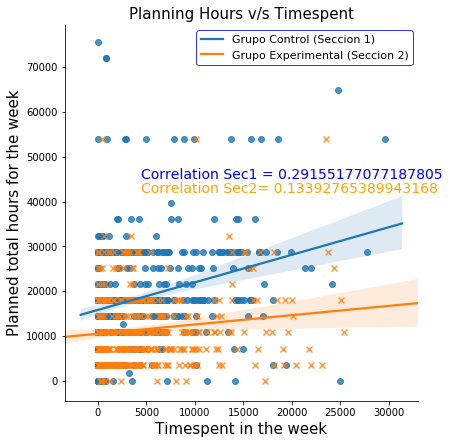

In [16]:
DELETE_EXAMS = False
if DELETE_EXAMS:
    df = df[(df['week'] != 3) & (df['week'] != 8) & (df['week'] != 11)]
    
else:
    pass

# df = df[df['week'] != 8]

sns.lmplot(x='timespent',y='planning_hours', hue='sec', markers=["o", "x"],
           data=df, fit_reg=True, height=6, legend=False)

ax = plt.gca()

# Set Axis labels
ax.set_xlabel('Timespent in the week', fontsize=15)
ax.set_ylabel('Planned total hours for the week', fontsize=15)

# Grid
# ax.grid(True)

# Setting Titles
ax.set_title('Planning Hours v/s Timespent', fontsize=15)

# # Set cool Legend format
ax.legend(loc='best', fontsize=11, frameon=True, labels=['Grupo Control (Seccion 1)','Grupo Experimental (Seccion 2)']).get_frame().set_edgecolor('blue')

# Annotations
ax.annotate(s='Correlation Sec1 = ' + str(df[df['sec'] == 1][['planning_hours', 'timespent']].corr().iloc[0,1]), xy=(4500,45000), size=14, color = 'b') 
ax.annotate(s='Correlation Sec2= ' + str(df[df['sec'] == 2][['planning_hours', 'timespent']].corr().iloc[0,1]), xy=(4500,42000), size=14, color = 'orange') 



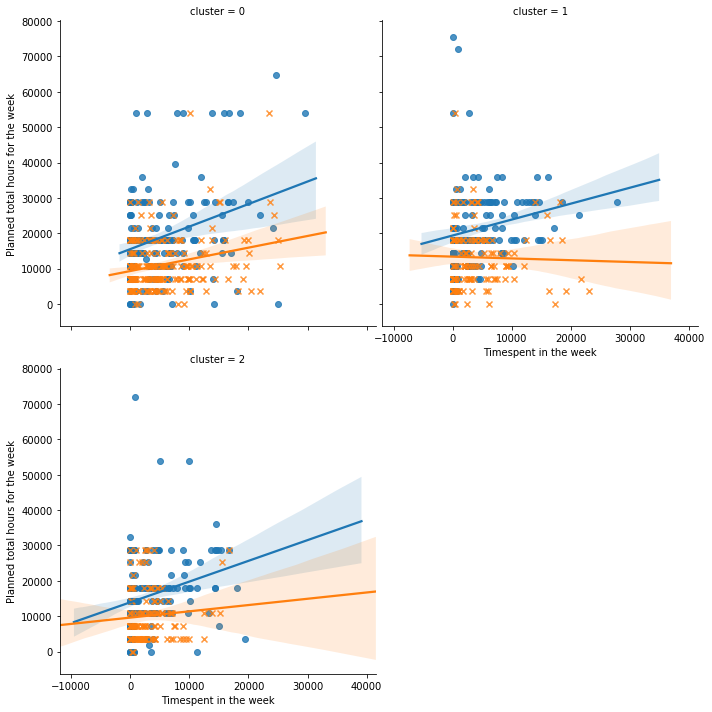

In [17]:
g = sns.lmplot(x='timespent',y='planning_hours', hue='sec', 
           data=df, col='cluster', height=5, legend=False, col_wrap=2, markers=["o", "x"])

g = (g.set_axis_labels('Timespent in the week', 'Planned total hours for the week')
#      .set( 
#           xticks=[], yticks=[2, 6, 8])
     .fig.subplots_adjust(wspace=.02))

### (3.2) By week

In [18]:
df['ratio'] = df['planning_hours']/df['timespent']
df['abs'] = np.absolute(df['planning_hours']-df['timespent'])

In [19]:
df.head()

,num_alumno,week,timespent,planning_hours,sec,cluster,ratio,abs
0,1162390J,1.0,6232.689667,28800.0,1,1,4.620798,22567.310333
1,1162390J,2.0,13353.045778,28800.0,1,1,2.156811,15446.954222
2,1162390J,6.0,605.754514,18000.0,1,1,29.715008,17394.245486
3,1162390J,7.0,10143.925312,10800.0,1,1,1.064677,656.074688
4,1162390J,8.0,0.000000,10800.0,1,1,inf,10800.000000


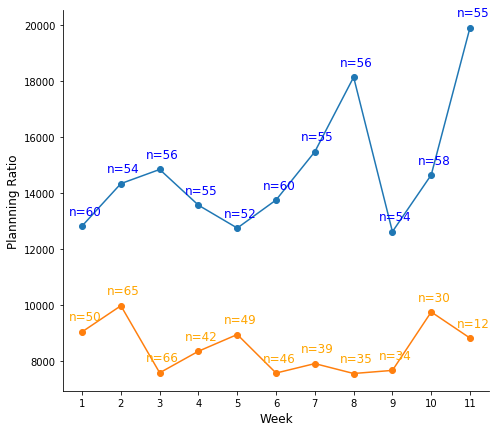

In [25]:
DELETE_EXAMS = False
if DELETE_EXAMS:
    aux_mean = df[(df['week'] != 3) & (df['week'] != 8) & (df['week'] != 11)].groupby(['week', 'sec'])[['number_interactions']].mean()
    
else:
#     aux_mean = df.replace([np.inf, -np.inf], np.NaN).groupby(['week', 'sec'])[['ratio']].mean()
    aux_mean = df.groupby(['week', 'sec'])[['abs']].mean()
    aux_count = df.groupby(['week', 'sec'])[['abs']].count()
    

fig = plt.figure(figsize=(26,7))
ax1 = fig.add_subplot(1,3,1)

# plotting
aux_mean['abs'].unstack(level=1).plot.line(ax=ax1, legend=False, marker='o')

# setting title
# ax1.set_title('PLanning v/s Real Time \n Control Group (Blue) and Experimental Group (Orange)', 
#               fontsize=15)

# axis Labels
# ax1.set_ylabel('Distance between planning and real time', fontsize=12)
ax1.set_ylabel('Plannning Ratio', fontsize=12)

ax1.set_xlabel('Week', fontsize=12)

# tick styles
ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.set_xticks([1,2,3,4,5,6,7,8,9,10,11])

# set cool Legend format
# ax1.legend(labels=['Control Group (mean=' + str(int(aux_mean['abs'].unstack(level=1)[1].mean())) +')',
#                    'Experimental Group (mean=' + str(int(aux_mean['abs'].unstack(level=1)[2].mean())) +')'], 
#            loc='upper right', 
#            fontsize=11, 
#            frameon=True).get_frame().set_edgecolor('blue')
# ax1.legend(False)

# Horizontal line
# ax1.axhline(0, color='red', linestyle='-', linewidth=1)

# selecting spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)

for i in range(1, 12):
    ax1.annotate(s='n=' + str(aux_count['abs'].unstack(level=1).iloc[i-1][1]), 
                 xy=(i - 0.35, round(aux_mean['abs'].unstack(level=1).iloc[i-1][1], 2)+400), 
                 size=12, color = 'b') 
    
    ax1.annotate(s='n=' + str(aux_count['abs'].unstack(level=1).iloc[i-1][2]), 
                 xy=(i-0.35, round(aux_mean['abs'].unstack(level=1).iloc[i-1][2], 2)+400), 
                 size=12, color='orange') 
    



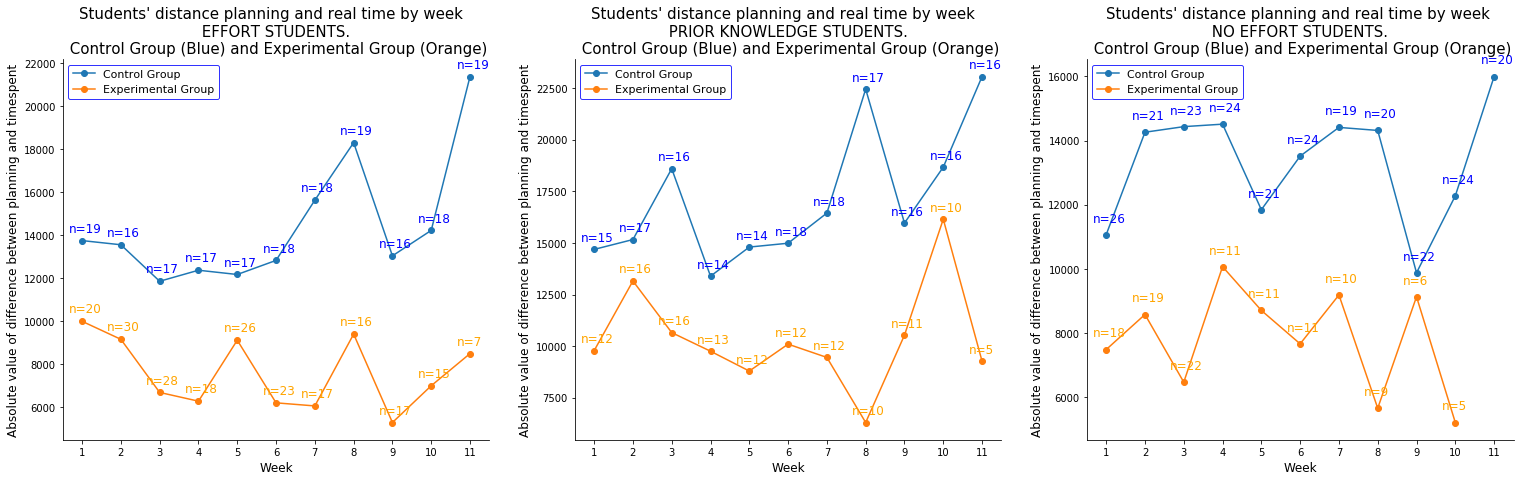

In [117]:
DELETE_EXAMS = False
if DELETE_EXAMS:
    aux_mean = df[(df['week'] != 3) & (df['week'] != 8) & (df['week'] != 11)].groupby(['week', 'cluster', 'sec'])[['number_interactions']].mean()
    
else:
    aux_mean = df.groupby(['week', 'cluster', 'sec'])[['abs']].mean()
    aux_count = df.groupby(['week', 'cluster', 'sec'])[['abs']].count()
    aux_count.fillna(0, inplace=True)

fig, axs = plt.subplots(1,3, figsize=(26, 7))

# plotting
aux_mean['abs'].unstack(level=[1,2])[0].plot(ax=axs[0], legend='best', marker='o')
aux_mean['abs'].unstack(level=[1,2])[1].plot(ax=axs[1], legend='best', marker='o')
aux_mean['abs'].unstack(level=[1,2])[2].plot(ax=axs[2], legend='best', marker='o')

# setting titles
axs[0].set_title('Students\' distance planning and real time by week  \n EFFORT STUDENTS. \n Control Group (Blue) and Experimental Group (Orange)', 
              fontsize=15)
axs[1].set_title('Students\' distance planning and real time by week  \n PRIOR KNOWLEDGE STUDENTS. \n Control Group (Blue) and Experimental Group (Orange)', 
              fontsize=15)
axs[2].set_title('Students\' distance planning and real time by week \n NO EFFORT STUDENTS. \n Control Group (Blue) and Experimental Group (Orange)', 
              fontsize=15)

for ax in range(3):
    # axis Labels
    axs[ax].set_ylabel('Absolute value of difference between planning and timespent', fontsize=12)
    axs[ax].set_xlabel('Week', fontsize=12)
    
    # tick Styles
    axs[ax].tick_params(axis='both', which='major', labelsize=10)
    axs[ax].set_xticks([1,2,3,4,5,6,7,8,9,10,11])
    
# set cool Legend format
    axs[ax].legend(labels=['Control Group','Experimental Group'], 
           loc='best', 
           fontsize=11, 
           frameon=True).get_frame().set_edgecolor('blue')


    axs[ax].spines['top'].set_visible(False)
    axs[ax].spines['right'].set_visible(False)
    axs[ax].spines['bottom'].set_visible(True)
    axs[ax].spines['left'].set_visible(True)
        
    for i in range(1, 12):
        try:
            axs[ax].annotate(s='n=' + str(int(aux_count['abs'].unstack(level=[1,2])[ax][1][i])), 
                             xy=(i - 0.35, round(aux_mean['abs'].unstack(level=[1,2])[ax][1][i], 2)+400), 
                             size=12, color = 'b') 

            axs[ax].annotate(s='n=' + str(int(aux_count['abs'].unstack(level=[1,2])[ax][2][i])), 
                         xy=(i - 0.35, round(aux_mean['abs'].unstack(level=[1,2])[ax][2][i], 2)+400), 
                         size=12, color = 'orange') 
        except:
            pass

In [114]:
aux_mean['abs'].unstack(level=[1,2])[2].fillna(0)

sec,1,2
week,,
1.0,11068.988078,7489.108370
2.0,14258.733553,8581.424696
3.0,14432.618503,6473.837648
4.0,14509.880306,10071.387849
5.0,11845.174720,8708.162577
6.0,13514.362679,7667.666476
7.0,14408.994560,9189.861922
8.0,14314.361049,5662.901620
9.0,9880.605682,9134.622807


In [70]:
aux_count['abs'].unstack(level=[1,2])[0]

sec,1,2
week,,
1.0,19.0,20.0
2.0,16.0,30.0
3.0,17.0,28.0
4.0,17.0,18.0
5.0,17.0,26.0
6.0,18.0,23.0
7.0,18.0,17.0
8.0,19.0,16.0
9.0,16.0,17.0


In [107]:
aux_count['abs'].unstack(level=[1,2])

cluster     0           1           2      
sec         1     2     1     2     1     2
week                                       
1.0      19.0  20.0  15.0  12.0  26.0  18.0
2.0      16.0  30.0  17.0  16.0  21.0  19.0
3.0      17.0  28.0  16.0  16.0  23.0  22.0
4.0      17.0  18.0  14.0  13.0  24.0  11.0
5.0      17.0  26.0  14.0  12.0  21.0  11.0
6.0      18.0  23.0  18.0  12.0  24.0  11.0
7.0      18.0  17.0  18.0  12.0  19.0  10.0
8.0      19.0  16.0  17.0  10.0  20.0   9.0
9.0      16.0  17.0  16.0  11.0  22.0   6.0
10.0     18.0  15.0  16.0  10.0  24.0   5.0
11.0     19.0   7.0  16.0   5.0  20.0   NaN

In [106]:
aux_count.fillna(0, inplace=True)

## Part 4: Hypothesis Testing

In [1]:
def t_test(data1, data2, variables=[]):
    data = {'item': [], 'mean1': [], 'std1': [], 'mean2': [], 'std2': [], 't': [], 'p': []}
    for var in variables:
        data['item'].append(var)
#         print('VARIABLE: ', var)
        
        data1_mean = data1[var].mean()
        data2_mean = data2[var].mean()
        data['mean1'].append(data1_mean)
        data['mean2'].append(data2_mean)
#         print("data1 mean value:", data1_mean)
#         print("data2 mean value:", data2_mean)
#         print("data1 m:", len(data1[var]))

        
        data1_std = data1[var].std()
        data2_std = data2[var].std()
        data['std1'].append(data1_std)
        data['std2'].append(data2_std)
#         print("data1 std value:",data1_std)
#         print("data2 std value:",data2_std)
        
        ttest,pval = ttest_ind(data1[var],data2[var])
        data['t'].append(ttest)
        data['p'].append(pval)
#         print("t-value",ttest)
#         print("p-value",pval)
#         print()
        
    return pd.DataFrame(data)
        

In [3]:
aux_timespent = df_interactions[['num_alumno', 'week', 'timespent']].groupby(['num_alumno', 'week']).sum()

aux_timespent = aux_timespent['timespent'].unstack(level=1).reset_index().fillna(0)

aux_timespent = pd.merge(left=aux_timespent, right=df_sec, left_on='num_alumno', right_on='num_alumno')
aux_timespent = pd.merge(left=aux_timespent, right=df_clusters, left_on='num_alumno', right_on='num_alumno')
# aux_timespent

In [2]:
variables = [1,2,3,4,5,6,7,8,9,10,11]

In [17]:
data1, data2 = aux_timespent[aux_timespent['sec'] == 1], aux_timespent[aux_timespent['sec'] == 2]
aux = t_test(data1, data2, variables)
# aux.to_csv('../../results/h2_number_interactions_sections.csv', index=False)
aux

,item,mean1,std1,mean2,std2,t,p
0,1,3642.704267,3573.402124,3335.462368,3455.324897,0.596947,0.551269
1,2,3619.804828,3850.299851,3959.115047,4208.563534,-0.570742,0.568864
2,3,9115.929156,6460.209694,10390.986984,6702.848541,-1.317795,0.189193
3,4,1870.891735,2711.522310,2320.592321,2344.434282,-1.218948,0.224408
4,5,1719.860901,2401.463187,1890.008472,2325.125185,-0.491569,0.623604
5,6,2141.437307,2760.751334,2974.260349,3458.827869,-1.792938,0.074608
6,7,1132.353060,2782.822053,2191.759796,2686.664927,-2.645323,0.008860
7,8,8787.521541,7485.938100,10797.776439,8116.475477,-1.747577,0.082188
8,9,873.606001,2357.210533,1286.048858,2146.657103,-1.253432,0.211622
9,10,1362.405620,3144.356225,1491.813539,2399.643402,-0.319972,0.749348


In [16]:
aux_timespent

,num_alumno,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,sec,cluster
0,10635815,6271.680800,3093.770077,19965.344270,3585.809314,7841.223677,6440.468750,978.724235,5379.657684,29.670000,12020.993625,4178.712471,2,0
1,1162390J,6232.689667,13353.045778,355.159750,3123.417021,3864.464844,605.754514,10143.925312,0.000000,3312.779000,0.000000,0.000000,1,1
2,12208884,1203.609143,6449.316838,3003.460889,563.321455,1770.409300,0.000000,0.000000,8999.119818,0.000000,458.942000,0.000000,2,2
3,12636029,2541.449158,3370.875415,27016.260316,677.571000,0.000000,2549.657526,0.000000,23308.598087,1049.493333,319.624667,94.693000,2,2
4,13620789,3788.204563,2470.119267,10757.113830,139.843200,151.030909,1393.640850,8408.787613,2119.375636,0.000000,23.596000,163.802000,1,2
5,13621254,637.435500,3012.192316,20462.941952,2097.480000,3115.674079,3688.570526,452.703214,23369.252782,377.267000,0.000000,5552.367429,2,0
6,13622048,0.000000,7869.222396,19349.493862,324.511000,3767.975000,1402.515905,0.000000,3749.923389,0.000000,2781.606857,12554.108000,1,2
7,13622986,6556.105029,4064.025231,4098.536884,4372.269417,664.230286,8818.788257,195.278182,6399.274903,416.965955,0.000000,6796.598127,2,1
8,13632701,4272.568889,212.786200,23671.182856,7806.938308,3296.127036,1140.342750,399.143000,23464.786441,3710.254444,8192.978182,7015.992941,2,0
9,13633589,2262.051786,826.596478,4439.631900,1730.098857,379.876618,384.750261,0.000000,6840.286250,0.000000,0.000000,301.059200,1,2
